## USA Residential Building Energy Consumption

- 주거 에너지 소비 조사(RECS)

- TARGET : TOTALDAL

# 🤓 데이터 확인 및 전처리

In [89]:
import pandas as pd

e_df = pd.read_csv('./datasets/USA Residential Building Energy Consumption.csv')
e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [90]:
e_df.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=759)

In [91]:
e_df.isna().sum().sum()

2382

In [92]:
missing_columns = e_df.columns[e_df.isna().any()]
print(missing_columns)

Index(['NGXBTU'], dtype='object')


In [93]:
e_df.NGXBTU.isna().sum()

2382

In [94]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB


### 1️⃣ 결측치 피쳐 삭제

In [95]:
pre_e_df = e_df.drop(labels=['NGXBTU'], axis=1)

In [96]:
pre_e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,PERIODEL,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,1,0,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,5,1,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,1,0,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,1,0,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,1,0,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,5,1,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,1,0,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,1,0,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,1,0,-2,-2,137.45,-2,-2,91.33,-2,-2


### 2️⃣ 타겟데이터 분포 확인

In [97]:
pre_e_df.TOTALDOL

0       1406.10
1       1366.00
2       2828.84
3       2102.98
4        910.89
         ...   
5681     514.00
5682     761.15
5683     481.24
5684    1626.78
5685    1141.69
Name: TOTALDOL, Length: 5686, dtype: float64

<Axes: >

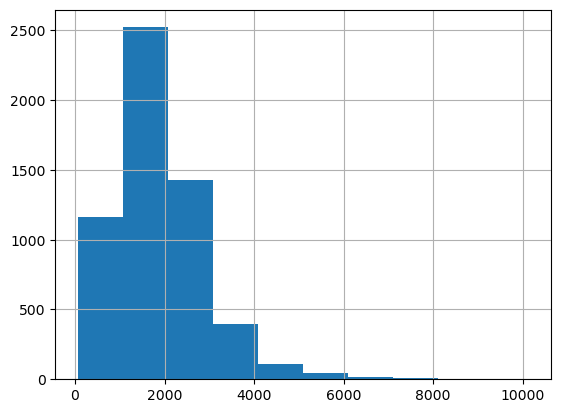

In [98]:
pre_e_df.TOTALDOL.hist()

### 3️⃣ 범주형 데이터 확인 및 처리

In [99]:
# 범주형 데이터 칼럼
object_columns = pre_e_df.select_dtypes(include=['object'])

# 결과 출력
display(object_columns)

,METROMICRO,UATYP10,CLIMATE_REGION_PUB,IECC_CLIMATE_PUB
0,METRO,U,Hot-Dry/Mixed-Dry,3B-4B
1,NONE,R,Hot-Humid,1A-2A
2,METRO,U,Mixed-Humid,3A
3,MICRO,C,Mixed-Humid,4A
4,METRO,U,Cold/Very Cold,5A
...,...,...,...,...
5681,METRO,U,Cold/Very Cold,6A-6B
5682,MICRO,C,Mixed-Humid,3A
5683,METRO,U,Cold/Very Cold,5A
5684,METRO,R,Hot-Humid,1A-2A


In [100]:
# 값 확인
for column in object_columns:
    print(pre_e_df[column].value_counts())

METROMICRO
METRO    4745
MICRO     584
NONE      357
Name: count, dtype: int64
UATYP10
U    3928
R    1160
C     598
Name: count, dtype: int64
CLIMATE_REGION_PUB
Cold/Very Cold       2008
Mixed-Humid          1468
Hot-Humid            1036
Hot-Dry/Mixed-Dry     750
Marine                424
Name: count, dtype: int64
IECC_CLIMATE_PUB
5A               1240
4A               1021
1A-2A             846
3B-4B             644
3A                637
6A-6B             376
5B-5C             332
4C                215
3C                209
2B                106
7A-7B-7AK-8AK      60
Name: count, dtype: int64


In [101]:
# 함수를 통한 인코딩
# C : center(Central)
# U : urban
# R : rural

def urban_rating(uatyp10):
    if uatyp10 == 'C':
        return 2
    elif uatyp10 == 'U':
        return 1
    elif uatyp10 == 'R':
        return 0
    else:
        return None  # 유효하지 않은 유형일 경우 처리


In [102]:
pre_e_df.loc[:,'UATYP10'] = pre_e_df['UATYP10'].apply(urban_rating)
pre_e_df['UATYP10']

0       1
1       0
2       1
3       2
4       1
       ..
5681    1
5682    2
5683    1
5684    0
5685    1
Name: UATYP10, Length: 5686, dtype: object

In [103]:
# 중복된 정보 삭제
pre_e_df = pre_e_df.drop(labels = ['IECC_CLIMATE_PUB'], axis=1)

In [104]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_e_df['CLIMATE_REGION_PUB'])
pre_e_df.CLIMATE_REGION_PUB = result

print(result)

[1 2 4 ... 0 2 0]


In [105]:
# 인코딩 된 피쳐 확인
pre_e_df.CLIMATE_REGION_PUB

0       1
1       2
2       4
3       4
4       0
       ..
5681    0
5682    4
5683    0
5684    2
5685    0
Name: CLIMATE_REGION_PUB, Length: 5686, dtype: int32

In [106]:
# 함수를 통한 인코딩

def region_rating(region_type):
    if region_type == 'METRO':
        return 2
    elif region_type == 'MICRO':
        return 1
    elif region_type == 'NONE':
        return 0
    else:
        return None  # 알 수 없는 경우 0을 반환합니다.

In [107]:
pre_e_df.loc[:,'METROMICRO'] = pre_e_df.METROMICRO.apply(region_rating)

In [108]:
pre_e_df.METROMICRO

0       2
1       0
2       2
3       1
4       2
       ..
5681    2
5682    1
5683    2
5684    2
5685    2
Name: METROMICRO, Length: 5686, dtype: object

In [109]:
# 인코딩 후 dtype 확인
pre_e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 757 entries, DOEID to ZLPAMOUNT
dtypes: float64(261), int32(1), int64(493), object(2)
memory usage: 32.8+ MB


In [110]:
object_columns = pre_e_df.select_dtypes(include=['object'])

# 결과 출력
display(object_columns)

,METROMICRO,UATYP10
0,2,1
1,0,0
2,2,1
3,1,2
4,2,1
...,...,...
5681,2,1
5682,1,2
5683,2,1
5684,2,0


In [111]:
# 인코딩 후에도 범주형인 경우 직접 형변환
import numpy as np

for column in object_columns:
    pre_e_df[column] = pre_e_df[column].astype(np.int16)
    display(pre_e_df[column])

0       2
1       0
2       2
3       1
4       2
       ..
5681    2
5682    1
5683    2
5684    2
5685    2
Name: METROMICRO, Length: 5686, dtype: int16

0       1
1       0
2       1
3       2
4       1
       ..
5681    1
5682    2
5683    1
5684    0
5685    1
Name: UATYP10, Length: 5686, dtype: int16

In [112]:
# 타겟 데이터 위치 조정
pre_e_df['TARGET'] = pre_e_df.TOTALDOL

In [113]:
pre_e_df= pre_e_df.drop(labels=['TOTALDOL'], axis=1)

In [114]:
pre_e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,10001,4,10,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1406.10
1,10002,3,7,0,0,2,0,0,0,-2,...,1,-2,-2,137.45,-2,-2,91.33,-2,-2,1366.00
2,10003,3,6,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2828.84
3,10004,2,4,1,2,2,0,1,0,1,...,0,-2,-2,137.45,-2,-2,91.33,2,0,2102.98
4,10005,1,2,2,1,2,0,1,0,0,...,0,1,0,137.45,-2,-2,91.33,-2,-2,910.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,2,1,5,0,-2,-2,-2,...,1,5,1,137.45,-2,-2,91.33,-2,-2,514.00
5682,15683,3,6,1,2,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,761.15
5683,15684,2,3,2,1,5,0,-2,-2,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,481.24
5684,15685,3,7,2,0,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1626.78


## 🤓 차원 축소

In [115]:
# 이상치 제거
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_e_df.iloc[:, :-1])
std_pre_e_df = pd.DataFrame(result, columns=pre_e_df.iloc[:, :-1].columns)
std_pre_e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,PERIODEL,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,-1.731746,1.234125,1.523273,0.415577,0.180632,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
1,-1.731137,0.238208,0.467828,-3.225364,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,2.835918,2.858490,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
2,-1.730528,0.238208,0.116013,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,1.780696,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
3,-1.729919,-0.757710,-0.587616,-1.404894,2.008168,-0.511812,0.0,1.062500,0.574040,1.780696,...,-0.363810,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,2.092179,2.277167
4,-1.729309,-1.753628,-1.291246,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,0.971017,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,1.729309,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,2.835918,2.858490,2.193295,1.549609,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5682,1.729919,0.238208,0.116013,-1.404894,2.008168,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5683,1.730528,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,-0.363810,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5684,1.731137,0.238208,0.467828,0.415577,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535


In [116]:
for column in std_pre_e_df.columns:
    std_pre_e2_df = std_pre_e_df[std_pre_e_df[column].between(-1.96, 1.96)]

std_pre_e2_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,PERIODEL,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,-1.731746,1.234125,1.523273,0.415577,0.180632,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
1,-1.731137,0.238208,0.467828,-3.225364,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,2.835918,2.858490,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
2,-1.730528,0.238208,0.116013,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,1.780696,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
4,-1.729309,-1.753628,-1.291246,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,0.971017,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
6,-1.728091,0.238208,-0.235801,0.415577,0.180632,1.205606,0.0,-1.581427,-1.698144,-0.648341,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,1.729309,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,2.835918,2.858490,2.193295,1.549609,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5682,1.729919,0.238208,0.116013,-1.404894,2.008168,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5683,1.730528,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,-0.363810,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535
5684,1.731137,0.238208,0.467828,0.415577,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.363810,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535


In [117]:
std_pre_e2_df.loc[:, 'TARGET'] = pre_e_df.loc[std_pre_e2_df.index, 'TARGET']
std_pre_e2_df

C:\Users\user\AppData\Local\Temp\ipykernel_30064\1444812994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_pre_e2_df.loc[:, 'TARGET'] = pre_e_df.loc[std_pre_e2_df.index, 'TARGET']


,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,-1.731746,1.234125,1.523273,0.415577,0.180632,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,1406.10
1,-1.731137,0.238208,0.467828,-3.225364,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,2.858490,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,1366.00
2,-1.730528,0.238208,0.116013,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,1.780696,...,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,2828.84
4,-1.729309,-1.753628,-1.291246,0.415577,0.180632,-0.511812,0.0,1.062500,0.574040,0.971017,...,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,910.89
6,-1.728091,0.238208,-0.235801,0.415577,0.180632,1.205606,0.0,-1.581427,-1.698144,-0.648341,...,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,1015.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,1.729309,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,2.858490,2.193295,1.549609,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,514.00
5682,1.729919,0.238208,0.116013,-1.404894,2.008168,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.349835,0.372501,0.654447,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,761.15
5683,1.730528,-0.757710,-0.939431,0.415577,0.180632,2.064315,0.0,-1.581427,-1.698144,-0.648341,...,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,481.24
5684,1.731137,0.238208,0.467828,0.415577,-1.646904,-0.511812,0.0,0.181191,0.574040,-0.648341,...,-0.349835,-0.993095,-1.135876,0.060095,-0.218524,-0.228634,-2.842171e-14,-0.313266,-0.327535,1626.78


In [118]:
pre_e_df = pre_e_df.iloc[std_pre_e2_df.index]
pre_e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,10001,4,10,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1406.10
1,10002,3,7,0,0,2,0,0,0,-2,...,1,-2,-2,137.45,-2,-2,91.33,-2,-2,1366.00
2,10003,3,6,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2828.84
4,10005,1,2,2,1,2,0,1,0,0,...,0,1,0,137.45,-2,-2,91.33,-2,-2,910.89
6,10007,3,5,2,1,4,0,-2,-2,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1015.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,2,1,5,0,-2,-2,-2,...,1,5,1,137.45,-2,-2,91.33,-2,-2,514.00
5682,15683,3,6,1,2,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,761.15
5683,15684,2,3,2,1,5,0,-2,-2,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,481.24
5684,15685,3,7,2,0,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1626.78


In [119]:
pre_e_df.reset_index(drop=True, inplace=True)

In [120]:
pre_e_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,10001,4,10,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1406.10
1,10002,3,7,0,0,2,0,0,0,-2,...,1,-2,-2,137.45,-2,-2,91.33,-2,-2,1366.00
2,10003,3,6,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2828.84
3,10005,1,2,2,1,2,0,1,0,0,...,0,1,0,137.45,-2,-2,91.33,-2,-2,910.89
4,10007,3,5,2,1,4,0,-2,-2,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1015.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,15682,2,3,2,1,5,0,-2,-2,-2,...,1,5,1,137.45,-2,-2,91.33,-2,-2,514.00
5109,15683,3,6,1,2,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,761.15
5110,15684,2,3,2,1,5,0,-2,-2,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,481.24
5111,15685,3,7,2,0,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1626.78


### 1️⃣ OLS를 통한 수치 확인

In [121]:
from statsmodels.api import OLS

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.461e+11
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        22:37:57   Log-Likelihood:                 22098.
No. Observations:                5113   AIC:                        -4.278e+04
Df Residuals:                    4405   BIC:                        -3.815e+04
Df Model:                         707                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
DOEID               2.615e-08   3.18

### 2️⃣ 훈련, 검증, 테스트 데이터 분할

In [122]:
# 훈련, 테스트 분할

from sklearn.model_selection import train_test_split

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1] 

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=124)

In [123]:
train_df = pd.concat([X_train,y_train], axis =1).reset_index(drop=True)
test_df = pd.concat([X_test,y_test], axis =1).reset_index(drop=True)

In [124]:
# 훈련, 검증 분할

from sklearn.model_selection import train_test_split

features, targets = train_df.iloc[:, :-1], train_df.iloc[:, -1] 

X_train, X_val, y_train, y_val = \
train_test_split(features,targets, test_size=0.2, random_state=124)

In [125]:
train_df = pd.concat([X_train,y_train], axis =1).reset_index(drop=True)
val_df = pd.concat([X_val,y_val], axis =1).reset_index(drop=True)

In [126]:
display(train_df)
display(val_df)
display(test_df)

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,11016,2,3,1,2,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1512.65
1,14770,1,1,0,2,5,0,-2,-2,-2,...,0,5,1,137.45,-2,-2,91.33,-2,-2,864.04
2,11183,3,7,2,1,4,0,-2,-2,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1334.40
3,12130,3,5,1,0,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1337.39
4,14758,4,9,2,1,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,971.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,14179,2,3,2,1,5,0,-2,-2,-2,...,1,5,1,137.45,-2,-2,91.33,-2,-2,594.00
3268,11039,4,8,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2661.73
3269,14844,4,10,2,1,1,0,-2,-2,-2,...,0,2,0,137.45,-2,-2,91.33,-2,-2,398.28
3270,13066,3,5,2,2,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1699.14


,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,12189,3,7,2,2,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1555.85
1,13926,4,10,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1621.46
2,11763,3,6,2,1,2,0,1,0,0,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2314.97
3,12318,1,2,2,1,4,0,-2,-2,-2,...,0,5,1,137.45,-2,-2,91.33,-2,-2,2805.50
4,15648,3,5,2,1,3,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1102.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,14840,1,2,2,2,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2463.81
814,15534,3,7,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2424.25
815,13186,3,7,2,1,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,2524.35
816,14957,2,3,2,0,1,0,-2,-2,-2,...,0,1,0,137.45,5,1,91.33,-2,-2,2417.19


,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,TARGET
0,15494,2,3,2,0,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,1896.37
1,12727,3,7,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,5711.16
2,12259,1,2,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2495.23
3,10599,4,10,2,1,5,0,-2,-2,-2,...,0,5,1,137.45,-2,-2,91.33,-2,-2,1011.96
4,14164,1,2,2,1,2,0,1,0,1,...,0,-2,-2,137.45,1,0,91.33,-2,-2,2820.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,11620,1,2,2,1,3,0,1,0,0,...,0,1,0,137.45,-2,-2,91.33,-2,-2,3072.20
1019,11950,3,7,0,0,2,0,0,0,-2,...,0,-2,-2,137.45,-2,-2,91.33,-2,-2,1402.17
1020,14225,4,8,2,1,2,0,1,0,1,...,0,1,0,137.45,-2,-2,91.33,-2,-2,3130.58
1021,14341,3,5,2,1,2,0,0,0,-2,...,0,1,0,137.45,-2,-2,91.33,-2,-2,2130.81


In [127]:
# 각 데이터 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

# train
pca_train = pca.fit_transform(train_df.iloc[:,:-1])

# validation
pca_val = pca.fit_transform(val_df.iloc[:,:-1])

# test
pca_test = pca.fit_transform(test_df.iloc[:,:-1])

print(pca_train.shape,pca_val.shape, pca_test.shape)

(3272, 10) (818, 10) (1023, 10)


In [128]:
# 훈련 데이터 칼럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'TARGET'] = train_df['TARGET']

In [129]:
# 검증 데이터 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_val.shape[1])]

# 데이터 프레임 생성
pca_val_df = pd.DataFrame(pca_val, columns=pca_columns)
pca_val_df.loc[:, 'TARGET'] = val_df['TARGET']

In [130]:
# 테스트 데이터 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'TARGET'] = test_df['TARGET']

In [131]:
# 보존률 확인

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.34853136 0.18436545 0.03708586 0.02362182 0.01714157 0.01062386
 0.01000679 0.00977318 0.00952546 0.00872971]
0.6594050566092842


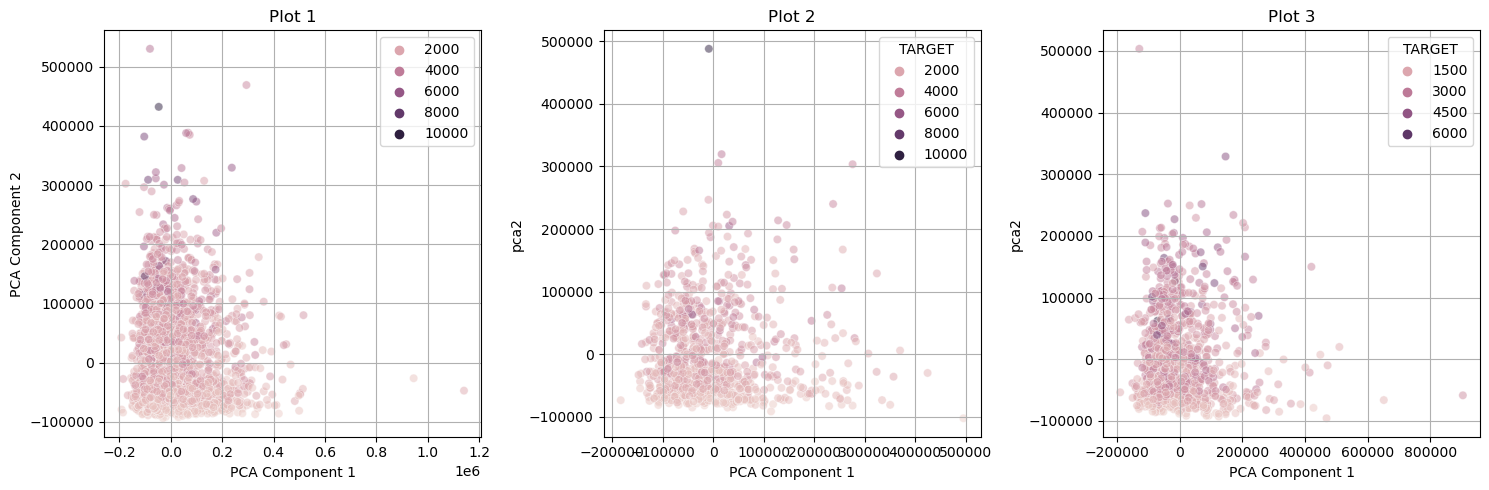

In [132]:
# 각 데이터의 차원 축소 후 분포 pca1, 2를 통해서 시각화 확인

import seaborn as sns
import matplotlib.pyplot as plt

# figure와 subplot 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# subplot에 scatter plot 그리기
sns.scatterplot(x="pca1", y="pca2", hue="TARGET", data=pca_train_df, alpha=0.5, ax=axes[0])
axes[0].set_title('Plot 1')

sns.scatterplot(x="pca1", y="pca2", hue="TARGET", data=pca_val_df, alpha=0.5, ax=axes[1])
axes[1].set_title('Plot 2')

sns.scatterplot(x="pca1", y="pca2", hue="TARGET", data=pca_test_df, alpha=0.5, ax=axes[2])
axes[2].set_title('Plot 3')

# 공통 x축 라벨 설정
for ax in axes:
    ax.set_xlabel('PCA Component 1')

# 공통 y축 라벨 설정
axes[0].set_ylabel('PCA Component 2')

# 범례 표시
axes[0].legend()

# 그리드 표시
for ax in axes:
    ax.grid(True)

# 그래프 보이기
plt.tight_layout()
plt.show()


In [159]:
pca_e_df = pd.concat([pca_train_df,pca_test_df,pca_val_df], axis = 0).reset_index(drop=True)

In [160]:
pca_e_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,TARGET
0,12978.567421,55406.485679,-24028.662108,367.067398,2663.930996,-1228.530541,-3462.130559,-5570.838949,-394.049237,-116.482189,1512.65
1,236237.505726,-17210.902612,-35902.197751,11656.994854,-2238.319511,2464.425616,-2633.429822,-3599.188673,5661.001663,1229.159078,864.04
2,87326.383806,-32782.476596,-1867.403176,-11567.709918,1205.739895,12804.526985,-10126.249854,4613.098927,2999.890676,30904.941790,1334.40
3,47401.684159,-64191.964835,7737.788036,-7264.949357,2328.189710,-1347.739748,9611.295952,-3197.134644,-9506.727839,-3875.776926,1337.39
4,-73109.317963,-72617.951823,-7886.707101,-6.775000,-314.152418,-3543.881191,4698.712131,681.384577,-2380.489119,-1041.318877,971.79
...,...,...,...,...,...,...,...,...,...,...,...
5108,13672.340612,41566.689400,2867.781974,-14669.888661,7134.313393,12679.749957,8290.170574,3236.442649,6742.318394,1326.659940,2463.81
5109,-41027.694338,-2550.677675,30534.136732,-27671.048674,172.876909,812.888295,-3361.051166,976.890738,2066.155787,-1175.419188,2424.25
5110,126301.529130,-33314.603465,53822.243585,-38754.962005,-3790.679824,-2946.935719,-9193.035898,-4973.031301,1181.343372,-12237.828853,2524.35
5111,42897.242233,83032.795078,5583.530187,6767.141590,-11498.022257,-517.452674,11175.527870,-77137.205804,45276.111995,13707.028124,2417.19


## 🤓 1st Cycle

In [295]:
# 파이프 라인을 통한 회귀 분석

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)


In [306]:
l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=5)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=5)),
                ('l_r', LinearRegression())])

In [309]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

    # 데이터프레임 생성
    evaluation_df = pd.DataFrame({
        'MSE':[MSE], 
        'RMSE':[RMSE], 
        # 'MSLE':[MSLE],
        # 'RMSLE':[RMSLE],
        'R2':[R2],
    })

    return evaluation_df

#### 📊검증 데이터 예측

In [310]:
prediction = pipe.predict(X_val)
val_eval1 = get_evaluation(y_val, prediction)

MSE: 473613.9441, RMSE: 688.1962, R2: 0.4814


#### 📊테스트 데이터 예측

In [311]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

    # 데이터프레임 생성
    evaluation_df = pd.DataFrame({
        'MSE':[MSE], 
        'RMSE':[RMSE], 
        # 'MSLE':[MSLE],
        # 'RMSLE':[RMSLE],
        'R2':[R2],
    })

    return evaluation_df

In [312]:
prediction = pipe.predict(X_test)
test_eval1 = get_evaluation(y_test, prediction)

MSE: 403861.2132, RMSE: 635.5008, R2: 0.5318


## 🤓 2nd Cycle

- 정규화제외

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)


l_r = LinearRegression()

pipe = Pipeline([('pca', PCA(n_components=5)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)), ('l_r', LinearRegression())])

In [314]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

# 데이터프레임 생성
    evaluation_df = pd.DataFrame({
        'MSE':[MSE], 
        'RMSE':[RMSE], 
        'MSLE':[MSLE],
        'RMSLE':[RMSLE],
        'R2':[R2],
    })

    return evaluation_df

In [315]:
prediction = pipe.predict(X_val)
val_eval2 = get_evaluation(y_val, prediction)

MSE: 186799.2026, RMSE: 432.2027, MSLE: 0.0555, RMSLE: 0.2355, R2: 0.7955


In [316]:
prediction = pipe.predict(X_test)
test_eval2 = get_evaluation(y_test, prediction)

MSE: 187745.6331, RMSE: 433.2962, MSLE: 0.0555, RMSLE: 0.2357, R2: 0.7824


In [317]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('pca', PCA(n_components=5)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)), ('l_r', LinearRegression())])

In [321]:
y_train

2666     565.66
2925    1816.31
43      2696.14
627     1735.20
3913    2204.13
         ...   
681     3571.39
962     3220.18
135     2143.65
4764     809.22
4558     768.17
Name: TARGET, Length: 4090, dtype: float64

In [322]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

    # 데이터프레임 생성
    evaluation_df = pd.DataFrame({
        'MSE':[MSE], 
        'RMSE':[RMSE], 
        # 'MSLE':[MSLE],
        # 'RMSLE':[RMSLE],
        'R2':[R2],
    })

    return evaluation_df

In [323]:
prediction = pipe.predict(X_test)
test_eval_poly = get_evaluation(y_test, prediction)

MSE: 281982.6647, RMSE: 531.0204, R2: 0.6731


In [325]:
# 파이프 라인을 통한 회귀 분석

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_e_df.iloc[:, :-1], pre_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

In [330]:
pipe = Pipeline([('pca', PCA(n_components=5)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

print('W: {:,.4f}, b:{:,.4f}'.format(l_r.coef_[0],l_r.intercept_) )

W: -0.0005, b:1,810.2589


In [331]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))

    # 데이터프레임 생성
    evaluation_df = pd.DataFrame({
        'MSE':[MSE], 
        'RMSE':[RMSE], 
        'MSLE':[MSLE],
        'RMSLE':[RMSLE],
        'R2':[R2],
    })

    return evaluation_df

In [332]:
prediction = pipe.predict(X_val)
val_final_score = get_evaluation(y_val, prediction)

MSE: 186778.1071, RMSE: 432.1783, MSLE: 0.0553, RMSLE: 0.2353, R2: 0.7955


In [333]:
prediction = pipe.predict(X_test)
test_final_score = get_evaluation(y_test, prediction)

MSE: 187710.9536, RMSE: 433.2562, MSLE: 0.0554, RMSLE: 0.2353, R2: 0.7824


MSE: 187072.4297, RMSE: 432.5187, MSLE: 0.0525, RMSLE: 0.2291, R2: 0.7955


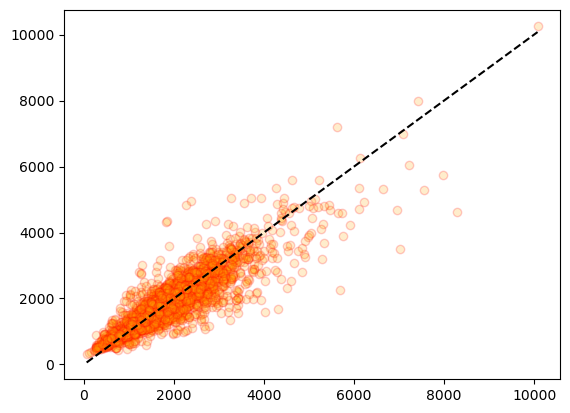

In [334]:
import matplotlib.pyplot as plt

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 187721.2002, RMSE: 433.2680, MSLE: 0.0554, RMSLE: 0.2355, R2: 0.7824


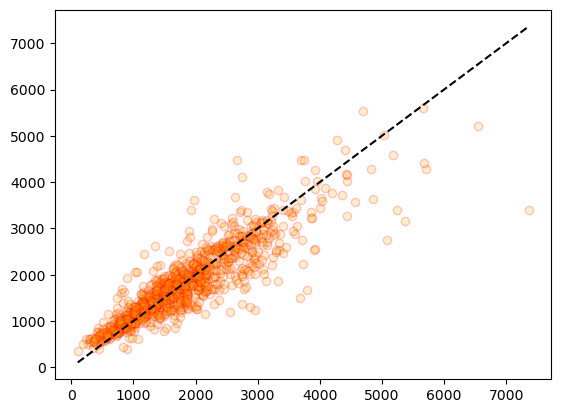

In [335]:
import matplotlib.pyplot as plt

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

MSE: 186787.2654, RMSE: 432.1889, MSLE: 0.0554, RMSLE: 0.2354, R2: 0.7955


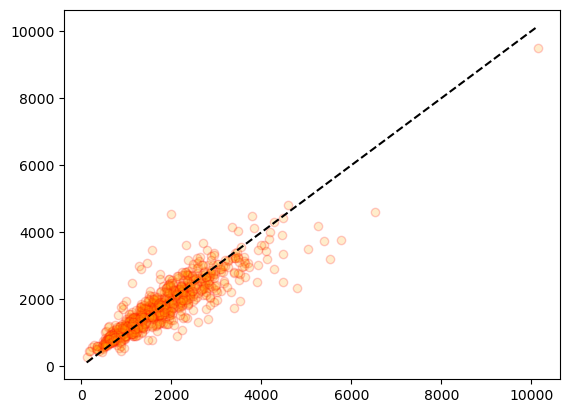

In [336]:
import matplotlib.pyplot as plt

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_val)
get_evaluation(y_val, prediction)

fig, ax = plt.subplots()
ax.scatter(y_val, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.show()

In [337]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(10,1)

    def forward(self, x):
        return self.linear(x)

In [338]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.linear_model import LinearRegression

# seed 값 픽스
torch.manual_seed(124)

features, targets = pca_e_df.iloc[:, :-1], pca_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

train_df = pd.concat([X_train,y_train], axis =1).reset_index(drop=True)

X_train, X_val, y_train, y_val = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)


l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(),lr= 1e-13)

epochs= 800000


for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0: 
        W = list(l_r.parameters())[0].detach().numpy().flatten()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {}, b: {:.4f}, loss:{:.4f}'.format(epoch, epochs, W, b, loss.item()))

1000/8000: W: [-0.03086921  0.03349892  0.17454977 -0.01460785  0.00768956 -0.22312617
 -0.11301986 -0.01831084 -0.0115224  -0.16689597], b: -0.2269, loss:72917112.0000
2000/8000: W: [-0.0045136   0.01607672  0.14220439 -0.01299975  0.00745061 -0.20889182
 -0.10594884 -0.01683764 -0.01179431 -0.1584763 ], b: -0.2269, loss:46717320.0000
3000/8000: W: [-0.00082953  0.0101073   0.11649757 -0.01153384  0.00715326 -0.19562879
 -0.09926865 -0.01561289 -0.011795   -0.15051782], b: -0.2269, loss:36631936.0000
4000/8000: W: [-0.00033389  0.00806917  0.09605893 -0.01021553  0.00683139 -0.18325071
 -0.09299766 -0.01447731 -0.01172158 -0.14296432], b: -0.2269, loss:29857522.0000
5000/8000: W: [-0.00029085  0.0073636   0.07981352 -0.00904201  0.00649971 -0.17168479
 -0.08712208 -0.01340872 -0.01160999 -0.13578883], b: -0.2269, loss:24975200.0000
6000/8000: W: [-0.00031015  0.0071109   0.06690503 -0.00800557  0.00616663 -0.16086961
 -0.08162019 -0.01240318 -0.0114709  -0.12897065], b: -0.2269, loss:

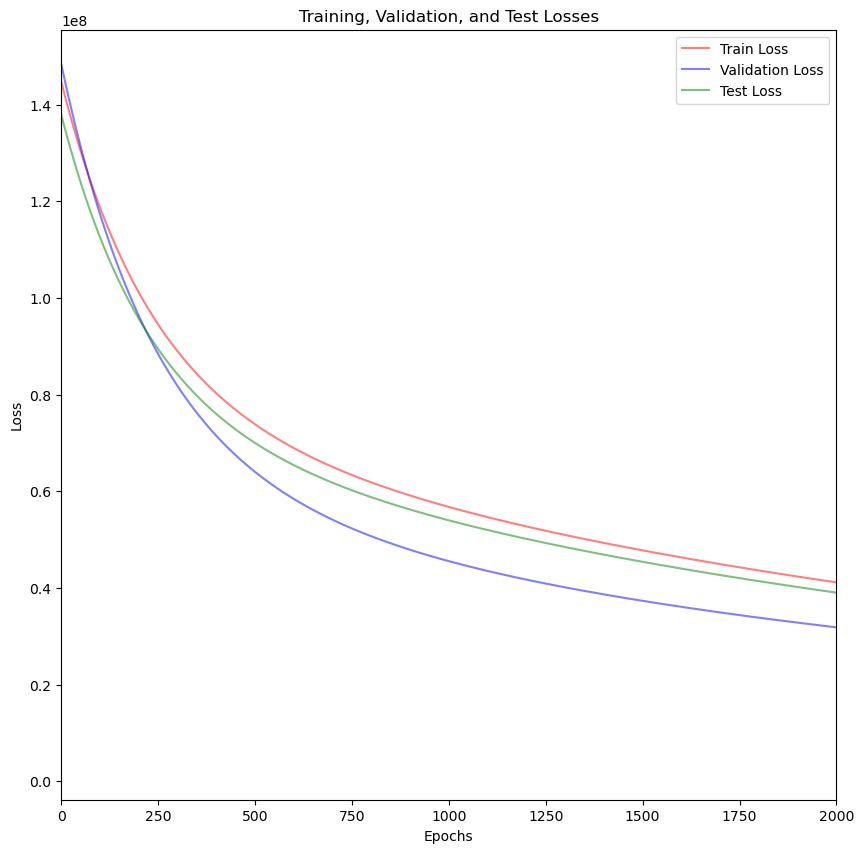

In [340]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn import Linear, Module
from torch.optim import SGD
import pandas as pd
from sklearn.model_selection import train_test_split

features, targets = pca_e_df.iloc[:, :-1], pca_e_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
    train_test_split(features, targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 데이터를 Tensor로 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)

# 모델 정의
class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(10, 1)

    def forward(self, x):
        return self.linear(x)

# 모델 생성
model = LinearRegressionModel()

# 손실 함수와 최적화 함수 정의
mse_loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-13)

# 훈련, 검증, 테스트 루프
num_epochs = 80000
train_losses, val_losses, test_losses = [], [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    train_H = model(X_train)
    train_loss = mse_loss(train_H, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_H = model(X_val)
        val_loss = mse_loss(val_H, y_val)
        optimizer.step()
        val_losses.append(val_loss.item())

    # Testing
    model.eval()
    with torch.no_grad():
        test_H = model(X_test)
        test_loss = mse_loss(test_H, y_test)
        test_losses.append(test_loss.item())

# 손실 그래프 그리기
plt.figure(figsize=(10, 10))
plt.plot(train_losses, label='Train Loss', c='red', alpha=0.5)
plt.plot(val_losses, label='Validation Loss',c='blue', alpha=0.5)
plt.plot(test_losses, label='Test Loss',c='green', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 2000)
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()

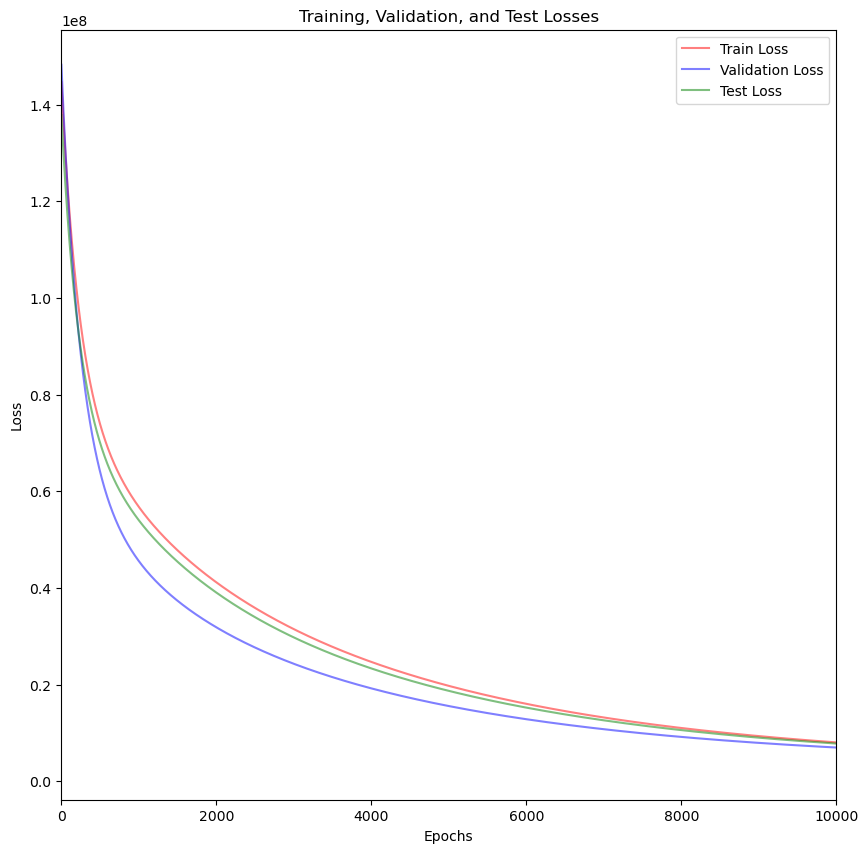

In [341]:

# 손실 그래프 그리기
plt.figure(figsize=(10, 10))
plt.plot(train_losses, label='Train Loss', c='red', alpha=0.5)
plt.plot(val_losses, label='Validation Loss',c='blue', alpha=0.5)
plt.plot(test_losses, label='Test Loss',c='green', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 10000)
plt.title('Training, Validation, and Test Losses')
plt.legend()
plt.show()